In [ ]:
import pandas as pd

# Ruta de los datos (ajusta el XX con tu número de dataset)
data_path = "../data/attrition_availabledata_00.csv.gz"
df = pd.read_csv(data_path, compression='gzip')

In [ ]:
# Ver las primeras filas
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,6.525485,10,2,3,1.0,3.0,2.0,59,Travel_Frequently,Research & Development,...,Y,19,8,1,20.0,4,4,1,3,No
1,6.521971,6,3,3,3.0,1.0,3.0,28,Travel_Rarely,Research & Development,...,Y,12,8,0,5.0,2,5,0,4,No
2,5.972315,9,3,3,4.0,1.0,1.0,37,Travel_Rarely,Research & Development,...,Y,11,8,1,10.0,5,10,0,8,Yes
3,10.060048,6,3,4,2.0,4.0,1.0,31,Travel_Frequently,Research & Development,...,Y,23,8,1,7.0,5,2,2,2,Yes
4,6.301183,11,3,3,4.0,3.0,3.0,55,Travel_Rarely,Sales,...,Y,15,8,1,23.0,3,19,9,11,No


In [ ]:
df.isnull().sum()

hrs                         0
absences                    0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    18
JobSatisfaction            13
WorkLifeBalance            23
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         14
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           7
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

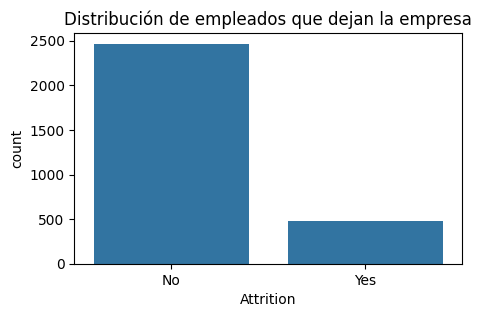

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
sns.countplot(x=df["Attrition"])
plt.title("Distribución de empleados que dejan la empresa")
plt.show()


In [ ]:
print(df.dtypes)

hrs                        float64
absences                     int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromot

In [38]:
# Convertir canonicos en int
# Cogemos las columnas que sean de tipo object y por cada columna la convierte en categorica y la cambia a int
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda x: x.astype('category').cat.codes)

In [40]:
print(df.dtypes)

hrs                        float64
absences                     int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
BusinessTravel                int8
Department                    int8
DistanceFromHome             int64
Education                    int64
EducationField                int8
EmployeeCount                int64
Gender                        int8
JobLevel                     int64
JobRole                       int8
MaritalStatus                 int8
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object


In [ ]:
# prompt: canonicos has a set number of objects convert this objects in int

# Convertir las columnas de tipo objeto a categóricas y luego a numéricas
for col in canonicos.columns:
    df[col] = pd.Categorical(df[col]).codes


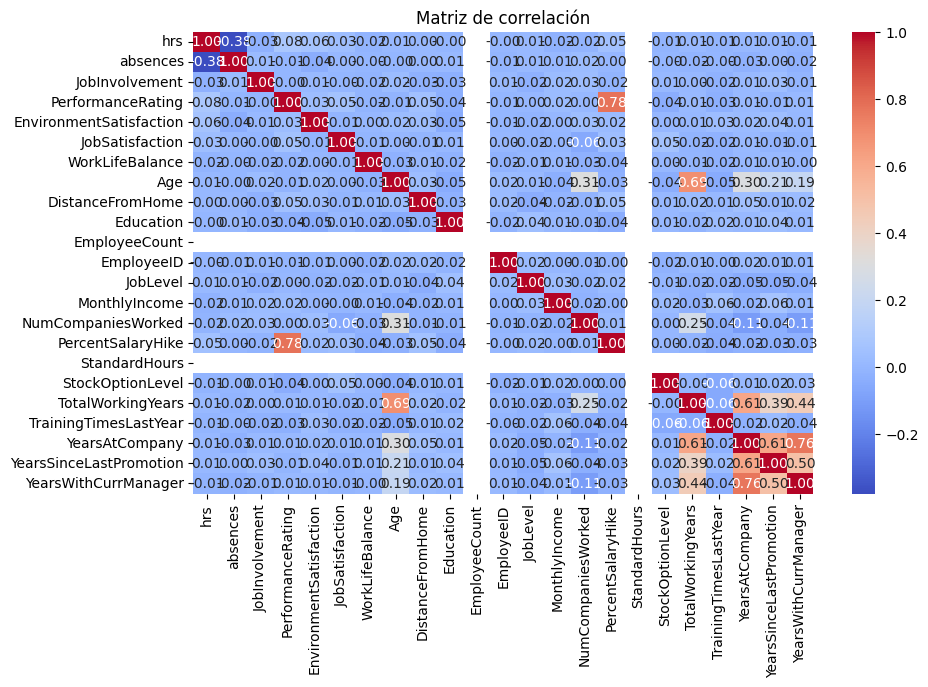

In [ ]:
corr = df.select_dtypes(include=[int, float]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [41]:
# Eliminamos algunas variables que no tengan ningun tipo de utilidad
# Eliminamos una variable si hay dos que son muy similares (PercentSalaryHike y Performance) y (YearsWithCurrManager y Years at the company)
df = df.drop([ "Over18","EmployeeID", "YearsWithCurrManager","PercentSalaryHike"])

KeyError: "['Over18', 'EmployeeID', 'YearsWithCurrManager', 'PercentSalaryHike'] not found in axis"